In [78]:
import numpy as np
from matplotlib import pyplot as plt

In [79]:
vx = np.fromfile("./NYX_f32/data/VelocityX.dat", dtype=np.float32)
vy = np.fromfile("./NYX_f32/data/VelocityY.dat", dtype=np.float32)
vz = np.fromfile("./NYX_f32/data/VelocityZ.dat", dtype=np.float32)
vtot = (vx**2 + vy**2 + vz**2)

In [80]:
vtot_5 = np.where(vtot > 0, 1 / vtot**0.5, 0)
vtot_4 = np.where(vtot > 0, 1 / vtot**0.4, 0)
vtot_3 = np.where(vtot > 0, 1 / vtot**0.3, 0)
vtot_2 = np.where(vtot > 0, 1 / vtot**0.2, 0)
vtot_1 = np.where(vtot > 0, 1 / vtot**0.1, 0)

In [81]:
def to_weights(weights, max_weight=4):
    max_val = np.max(np.abs(weights))

    abs_weights = np.abs(weights)
    log_weights = np.log2(max_val / abs_weights, where=abs_weights != 0)  # 避免对 0 求 log2
    log_weights = np.floor(log_weights).astype(np.int32)  # 转为整数，模拟 C++ 行为

    # 归一化权重的逻辑
    int_weights = np.where(abs_weights == 0, 0, max_weight - log_weights)
    int_weights = np.where(log_weights > max_weight, 0, int_weights)
            
    return int_weights


In [82]:
def weight_hist(weights):
    arr = [0, 0, 0, 0, 0]
    for weight in weights:
        arr[weight] += 1
    for i in range(5):
        print(f"weight = {i}: {arr[i]}")

weights of vtot_5
weight = 0: 134214974
weight = 1: 2436
weight = 2: 285
weight = 3: 29
weight = 4: 4
weights of vtot_4
weight = 0: 134195460
weight = 1: 20631
weight = 2: 1531
weight = 3: 99
weight = 4: 7
weights of vtot_3
weight = 0: 133501750
weight = 1: 693710
weight = 2: 21605
weight = 3: 647
weight = 4: 16
weights of vtot_2
weight = 0: 33696494
weight = 1: 96608741
weight = 2: 3890225
weight = 3: 22162
weight = 4: 106
weights of vtot_1
weight = 0: 0
weight = 1: 0
weight = 2: 33696531
weight = 3: 100498929
weight = 4: 22268


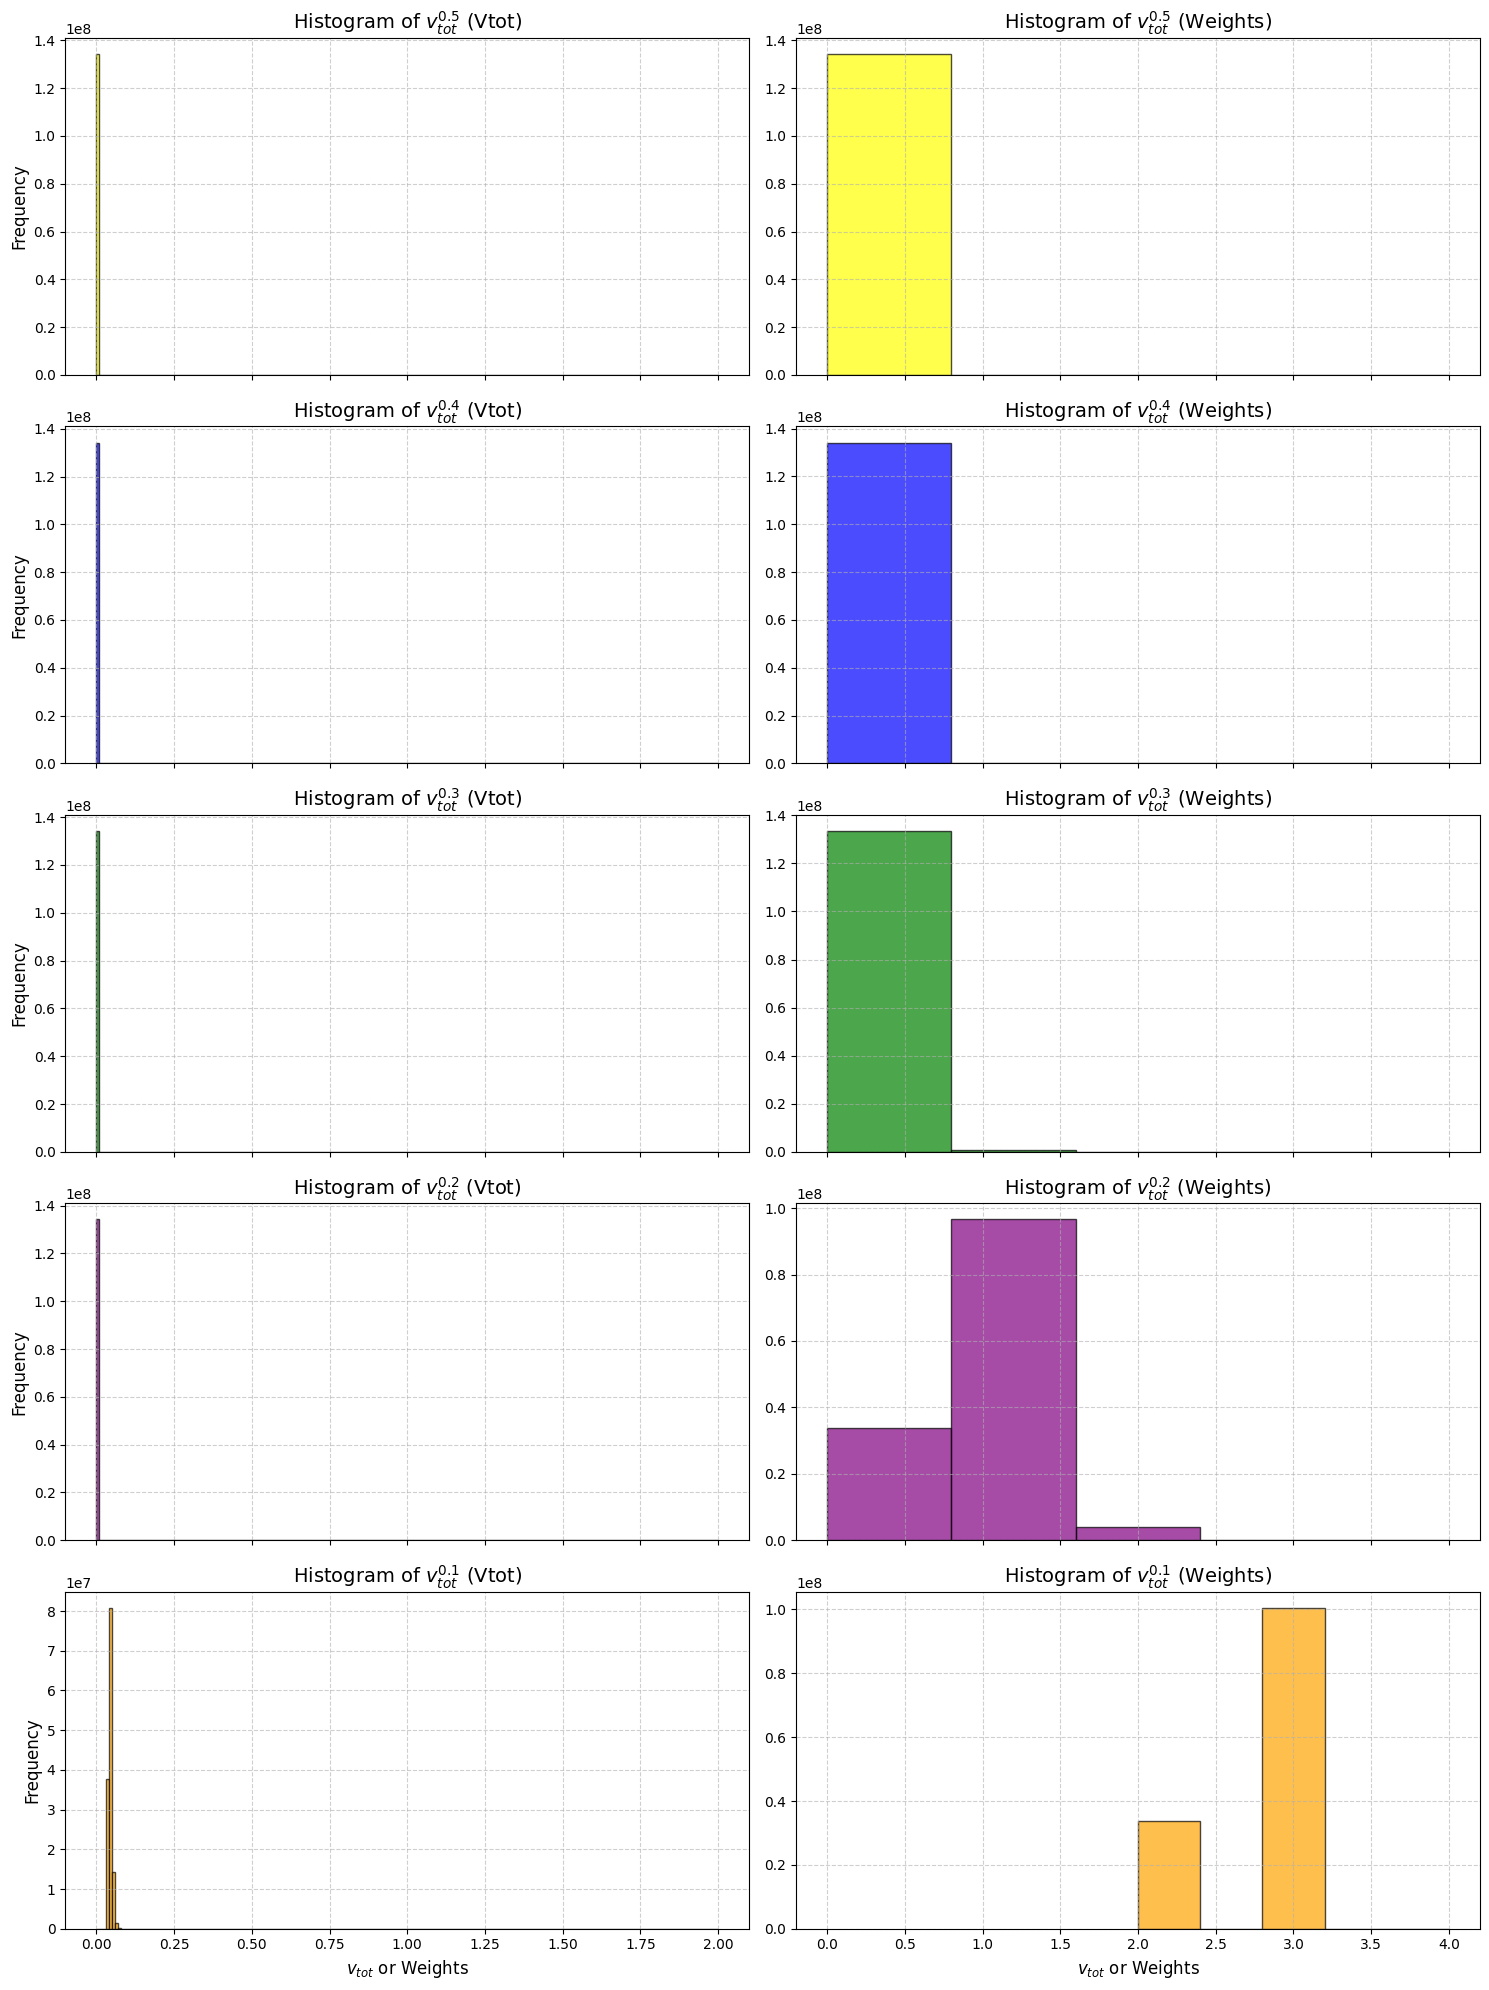

In [83]:
vtots = [vtot_5, vtot_4, vtot_3, vtot_2, vtot_1]
labels = ["$v_{tot}^{0.5}$", "$v_{tot}^{0.4}$", "$v_{tot}^{0.3}$", "$v_{tot}^{0.2}$", "$v_{tot}^{0.1}$"]
colors = ['yellow', 'blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex='col', sharey=False)

for i, (vtot, label, color) in enumerate(zip(vtots, labels, colors)):
    # histogram of vtot
    axes[i, 0].hist(vtot, bins=200, range=(0,2), color=color, alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f"Histogram of {label} (Vtot)", fontsize=14)
    axes[i, 0].set_ylabel("Frequency", fontsize=12)
    axes[i, 0].grid(True, linestyle='--', alpha=0.6)

    # histogram of weight
    weights = to_weights(vtot)
    print(f"weights of vtot_{5 - i}")
    weight_hist(weights)
    axes[i, 1].hist(weights, bins=5, color=color, alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(f"Histogram of {label} (Weights)", fontsize=14)
    axes[i, 1].grid(True, linestyle='--', alpha=0.6)

for ax in axes[-1, :]:
    ax.set_xlabel("$v_{tot}$ or Weights", fontsize=12)

plt.tight_layout()
plt.show()

weight = 0: 3504625
weight = 1: 104226
weight = 2: 7535
weight = 3: 305
weight = 4: 21


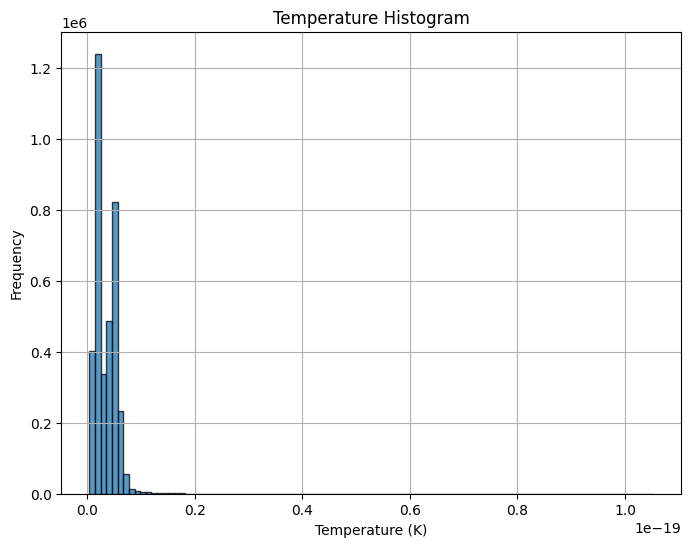

In [140]:
P = np.fromfile("./GE_small_f32/data/Pressure.dat", dtype=np.float32)
D = np.fromfile("./GE_small_f32/data/Density.dat", dtype=np.float32)
R = 287.1
T = P / (D * R)
#vtot_1 = np.where(vtot > 0, 1 / vtot**0.1, 0)
T = np.where(T > 0, 1 / T**8, 0)
T_weight = to_weights(T)
weight_hist(T_weight)
plt.figure(figsize=(8, 6))
plt.hist(T, bins=100, edgecolor='black', alpha=0.75)
plt.title("Temperature Histogram")
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


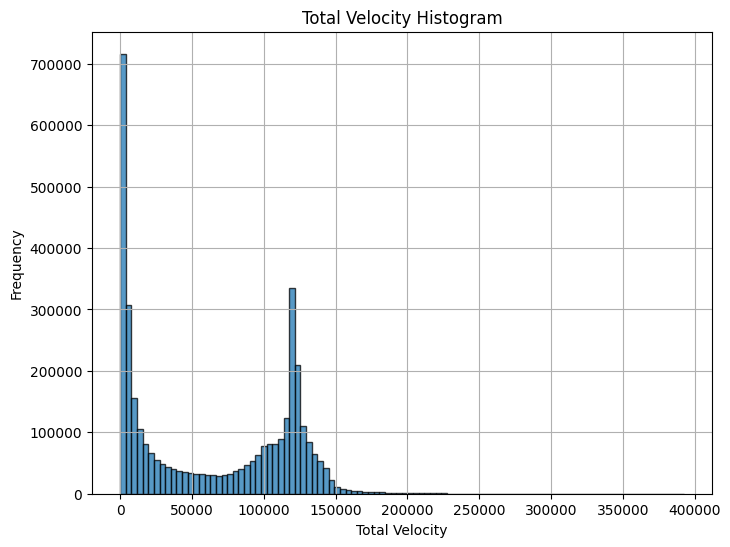

In [67]:
vx = np.fromfile("./GE_small_f32/data/VelocityX.dat", dtype=np.float32)
vy = np.fromfile("./GE_small_f32/data/VelocityY.dat", dtype=np.float32)
vz = np.fromfile("./GE_small_f32/data/VelocityZ.dat", dtype=np.float32)
vtot = (vx**2 + vy**2 + vz**2)
#vtot_1 = np.sqrt(vtot)
#vtot_1 = np.where(vtot > 0, 1 / vtot**0.1, 0)
plt.figure(figsize=(8, 6))
plt.hist(vtot, bins=100, edgecolor='black', alpha=0.75)
plt.title("Total Velocity Histogram")
plt.xlabel("Total Velocity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


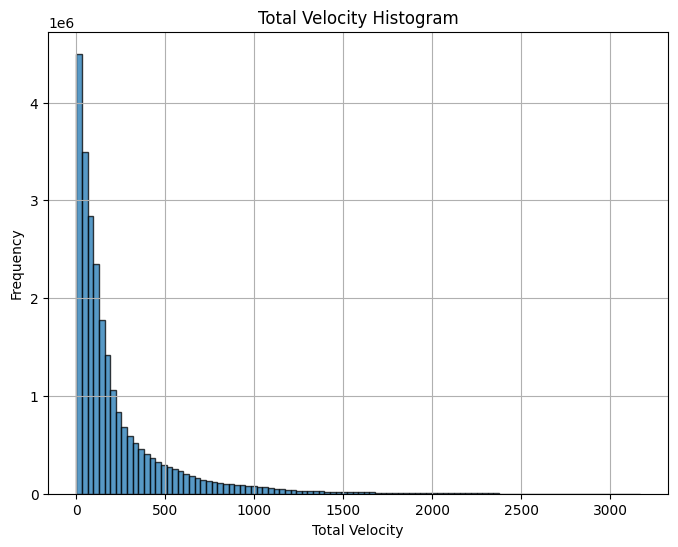

In [30]:
vx = np.fromfile("./Hurricane_f32/data/VelocityX.dat", dtype=np.float32)
vy = np.fromfile("./Hurricane_f32/data/VelocityY.dat", dtype=np.float32)
vz = np.fromfile("./Hurricane_f32/data/VelocityZ.dat", dtype=np.float32)
vtot = (vx**2 + vy**2 + vz**2)
plt.figure(figsize=(8, 6))
plt.hist(vtot, bins=100, edgecolor='black', alpha=0.75)
plt.title("Total Velocity Histogram")
plt.xlabel("Total Velocity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

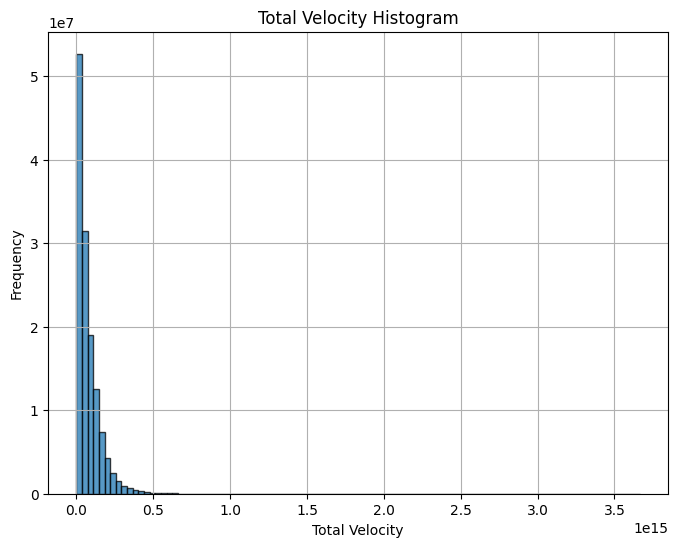

In [64]:
vx = np.fromfile("./NYX_f32/data/VelocityX.dat", dtype=np.float32)
vy = np.fromfile("./NYX_f32/data/VelocityY.dat", dtype=np.float32)
vz = np.fromfile("./NYX_f32/data/VelocityZ.dat", dtype=np.float32)
vtot = (vx**2 + vy**2 + vz**2)
plt.figure(figsize=(8, 6))
plt.hist(vtot, bins=100, edgecolor='black', alpha=0.75)
plt.title("Total Velocity Histogram")
plt.xlabel("Total Velocity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

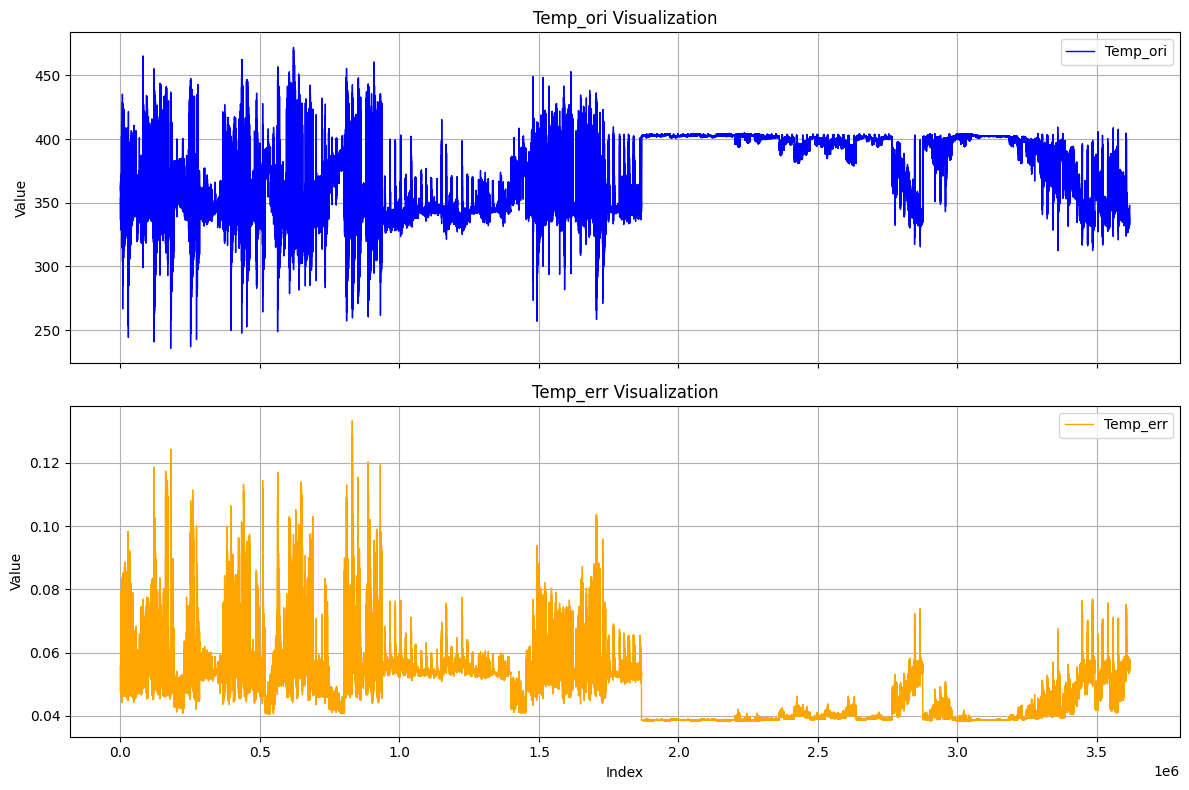

In [19]:
Temp_ori = np.fromfile("./build/Result/Temp_ori.dat", dtype=np.float32)
Temp_err = np.fromfile("./build/Result/Temp_err.dat", dtype=np.float32)

# 创建一个图包含两个子图
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 绘制 Temp_ori 子图
axs[0].plot(range(len(Temp_ori)), Temp_ori, label='Temp_ori', linewidth=1, color='blue')
axs[0].set_title("Temp_ori Visualization")
axs[0].set_ylabel("Value")
axs[0].grid(True)
axs[0].legend()

# 绘制 Temp_err 子图
axs[1].plot(range(len(Temp_err)), Temp_err, label='Temp_err', linewidth=1, color='orange')
axs[1].set_title("Temp_err Visualization")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Value")
axs[1].grid(True)
axs[1].legend()

# 调整布局
plt.tight_layout()
plt.show()

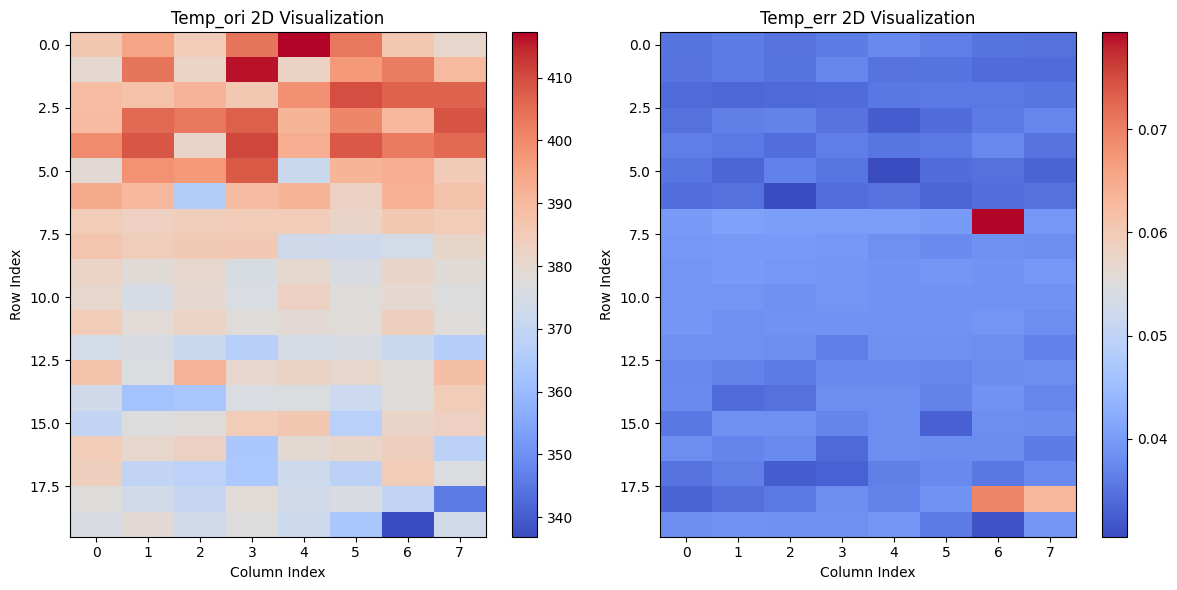

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# 替换为你的文件路径
temp_ori_file = "./build/Result/Temp_ori.dat"
temp_err_file = "./build/Result/Temp_err.dat"

# 加载数据
Temp_ori = np.fromfile(temp_ori_file, dtype=np.float32)
Temp_err = np.fromfile(temp_err_file, dtype=np.float32)

# 数据大小
data_length = len(Temp_ori)
rows = data_length // 8  # 截取的行数（数据整除8的最大行数）
cols = 8  # 固定为8列

# 截取数据
Temp_ori_2d = Temp_ori[870 * cols:890 * cols].reshape(20, cols)
Temp_err_2d = Temp_err[870 * cols:890 * cols].reshape(20, cols)

# 创建颜色图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Temp_ori 的颜色图
im1 = axs[0].imshow(Temp_ori_2d, cmap='coolwarm', aspect='auto')
axs[0].set_title("Temp_ori 2D Visualization")
axs[0].set_xlabel("Column Index")
axs[0].set_ylabel("Row Index")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Temp_err 的颜色图
im2 = axs[1].imshow(Temp_err_2d, cmap='coolwarm', aspect='auto')
axs[1].set_title("Temp_err 2D Visualization")
axs[1].set_xlabel("Column Index")
axs[1].set_ylabel("Row Index")
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# 调整布局
plt.tight_layout()
plt.show()


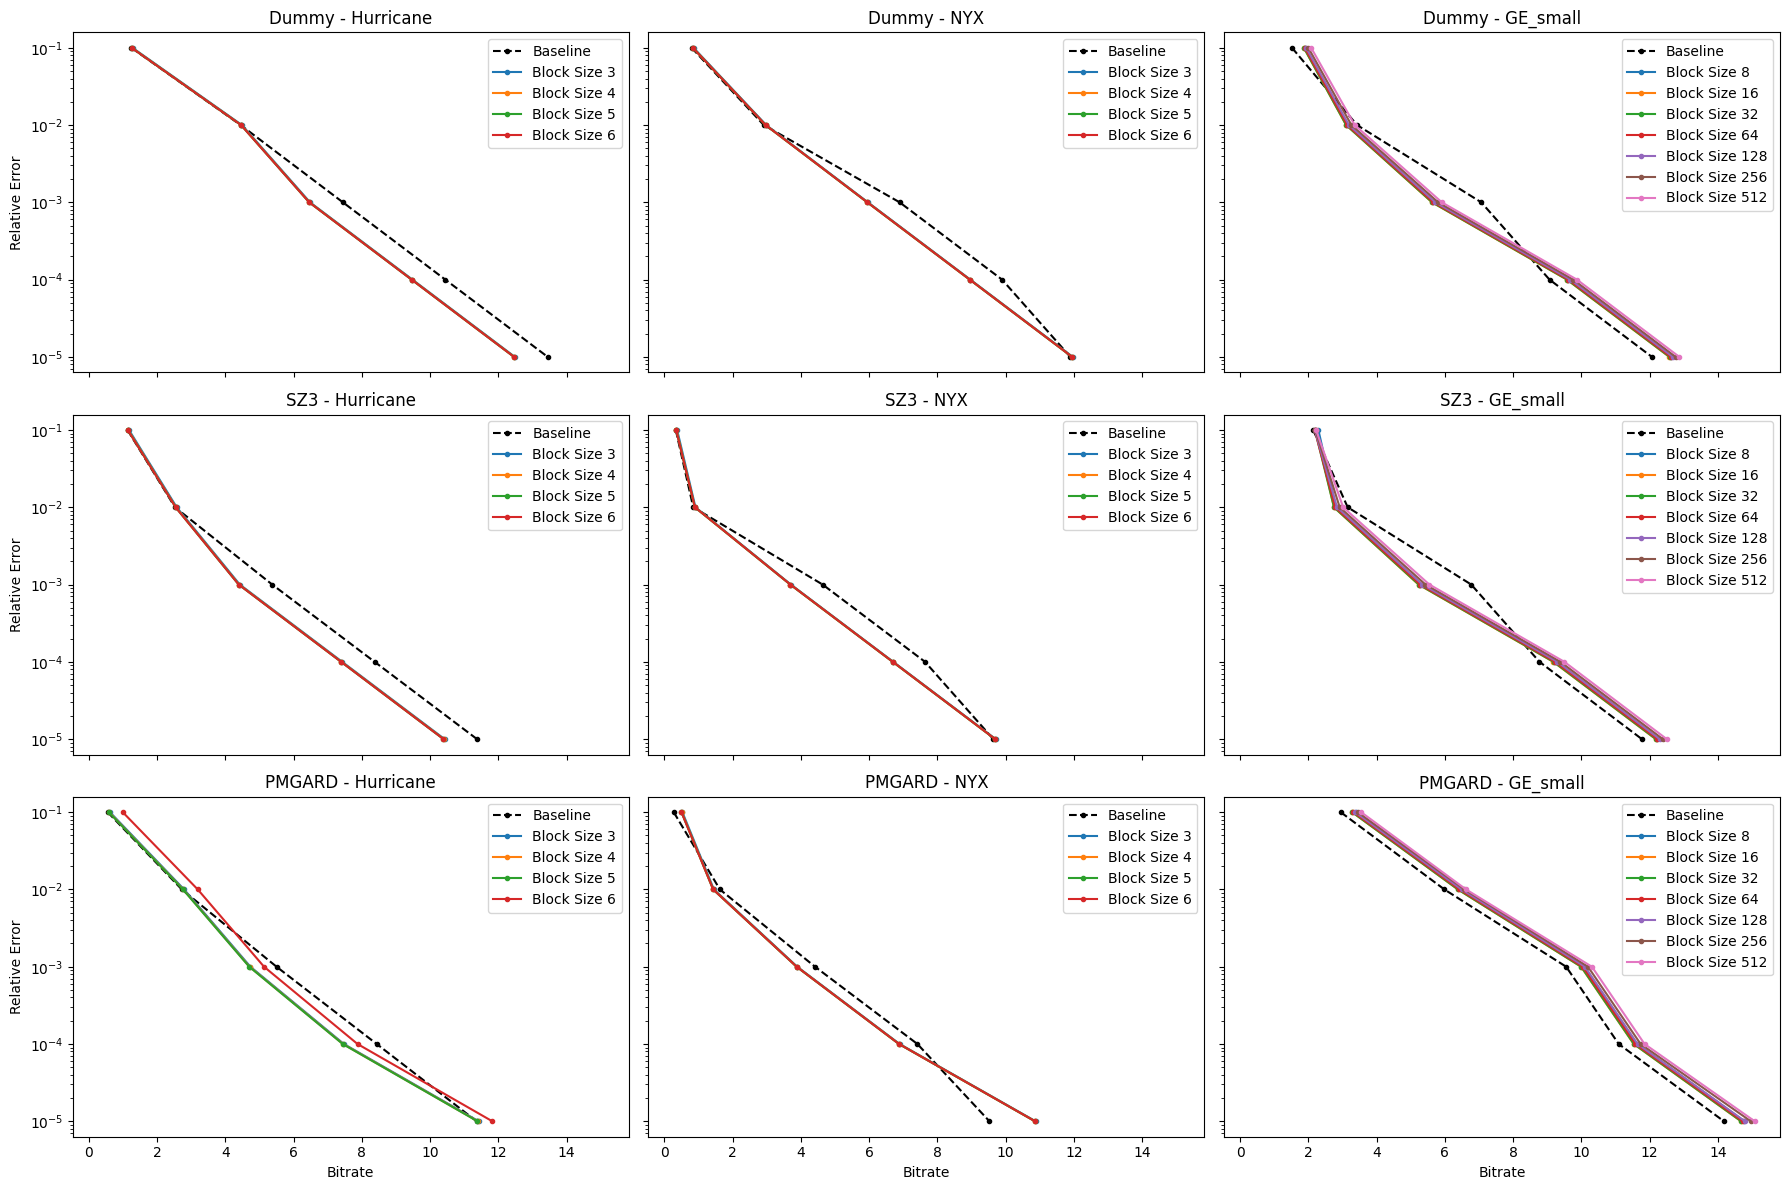

In [64]:
from _collections import defaultdict
import matplotlib.pyplot as plt

# 文件和数据集设置
files = ["Dummy_compression_ratios.txt", "SZ3_compression_ratios.txt", "PMGARD_compression_ratios.txt"]
compressors = ["Dummy", "SZ3", "PMGARD"]  # 压缩器名称
datasets = ["Hurricane", "NYX", "GE_small"]  # 数据集名称
error_bound = [0.1, 0.01, 0.001, 0.0001, 0.00001]  # 误差范围

# 初始化存储数据结构
data_dict = {compressor: {dataset: {"baseline": [], "bitrate_dict": defaultdict(list), "error_bound_dict": defaultdict(list)} 
                          for dataset in datasets} for compressor in compressors}

# 读取并解析数据
for file, compressor in zip(files, compressors):
    with open(f"./build/Result/{file}", "r") as f:
        lines = f.readlines()
    for line in lines:
        ds = line.rstrip().split(", ")[1]
        if ds not in datasets:
            continue
        if line.startswith("BP"):  # Baseline 数据
            bitrate = 32 / float(line.rstrip().split("cr = ")[1])
            data_dict[compressor][ds]["baseline"].append(bitrate)
        else:  # 其他数据
            max_weight = int(line.rstrip().split("max_weight: ")[1].split(", ")[0])
            if max_weight == 7:
                bitrate = 32 / float(line.rstrip().split("cr = ")[1])
                block_size = int(line.rstrip().split("block_size: ")[1].split(", ")[0])
                data_dict[compressor][ds]["bitrate_dict"][block_size].append(bitrate)
                data_dict[compressor][ds]["error_bound_dict"][block_size].append(float(line.split("Error Bound: ")[1].split(",")[0]))

# 创建 3x3 子图
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharey=True, sharex=True)
for i, compressor in enumerate(compressors):  # 压缩器为行
    for j, dataset in enumerate(datasets):  # 数据集为列
        ax = axs[i, j]
        data = data_dict[compressor][dataset]
        bitrate_dict = data["bitrate_dict"]
        error_bound_dict = data["error_bound_dict"]
        baseline = data["baseline"]
        
        # 绘制 baseline
        ax.plot(baseline, error_bound, label="Baseline", marker='.', linestyle='--', color='black')
        
        # 绘制其他 block_size 的折线
        for key in bitrate_dict.keys():
            x = bitrate_dict[key]  # X 轴为比特率
            y = error_bound_dict[key]  # Y 轴为误差范围
            ax.plot(x, y, label=f"Block Size {key}", marker='.', alpha=1)
            
            # 在每条折线末尾添加标签
            # ax.text(
            #     x[-1], y[-1],  # 最后一个点的位置
            #     f"{key}",  # 显示 block size
            #     fontsize=9, color='blue', ha='left', va='bottom'
            # )
            
            # 可选：在折线的中间添加标签（替代末尾标签）
            # mid_index = len(x) // 2  # 中间点的索引
            # ax.text(
            #     x[mid_index], y[mid_index],  # 中间点的位置
            #     f"{key}",  # 显示 block size
            #     fontsize=9, color='blue', ha='center', va='center'
            # )

        # 子图设置
        ax.set_title(f"{compressor} - {dataset}")
        if i == len(compressors) - 1:
            ax.set_xlabel("Bitrate")  # 仅为最后一行设置 X 轴标签
        if j == 0:
            ax.set_ylabel("Relative Error")  # 仅为第一列设置 Y 轴标签
        ax.set_yscale('log')  # 设置 Y 轴为对数刻度
        ax.grid(False)
        ax.legend()

# 调整布局并显示
plt.tight_layout()
plt.show()



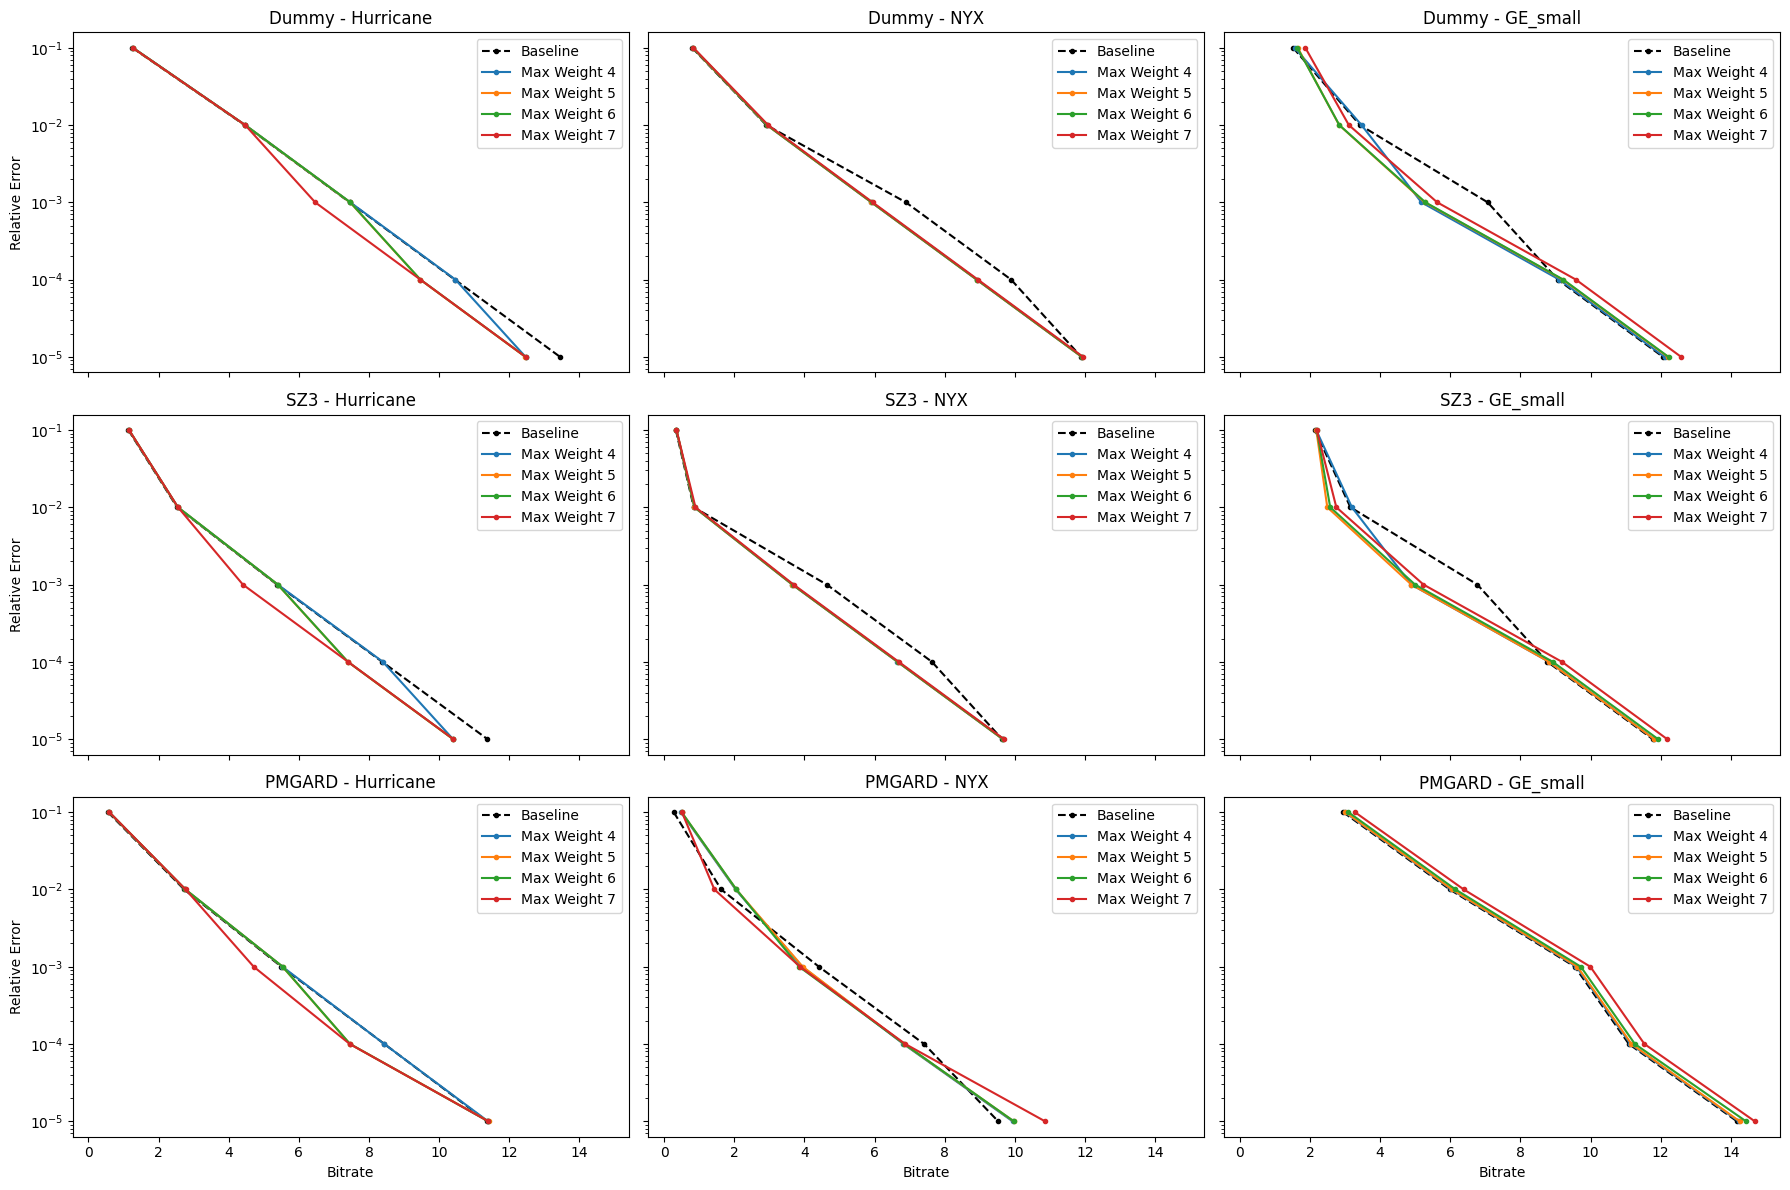

In [65]:
from _collections import defaultdict
import matplotlib.pyplot as plt

best_block_sizes = [4, 4, 32]
# 文件和数据集设置
files = ["Dummy_compression_ratios.txt", "SZ3_compression_ratios.txt", "PMGARD_compression_ratios.txt"]
compressors = ["Dummy", "SZ3", "PMGARD"]  # 压缩器名称
datasets = ["Hurricane", "NYX", "GE_small"]  # 数据集名称
error_bound = [0.1, 0.01, 0.001, 0.0001, 0.00001]  # 误差范围

# 初始化存储数据结构
data_dict = {compressor: {dataset: {"baseline": [], "bitrate_dict": defaultdict(list), "error_bound_dict": defaultdict(list)} 
                          for dataset in datasets} for compressor in compressors}

# 读取并解析数据
for file, compressor in zip(files, compressors):
    with open(f"./build/Result/{file}", "r") as f:
        lines = f.readlines()
    for line in lines:
        ds = line.rstrip().split(", ")[1]
        if ds not in datasets:
            continue
        if line.startswith("BP"):  # Baseline 数据
            bitrate = 32 / float(line.rstrip().split("cr = ")[1])
            data_dict[compressor][ds]["baseline"].append(bitrate)
        else:  # 其他数据
            block_size = int(line.rstrip().split("block_size: ")[1].split(", ")[0])
            if block_size in best_block_sizes:
                bitrate = 32 / float(line.rstrip().split("cr = ")[1])
                max_weight = int(line.rstrip().split("max_weight: ")[1].split(", ")[0])
                data_dict[compressor][ds]["bitrate_dict"][max_weight].append(bitrate)
                data_dict[compressor][ds]["error_bound_dict"][max_weight].append(float(line.split("Error Bound: ")[1].split(",")[0]))

# 创建 3x3 子图
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharey=True, sharex=True)
for i, compressor in enumerate(compressors):  # 压缩器为行
    for j, dataset in enumerate(datasets):  # 数据集为列
        ax = axs[i, j]
        data = data_dict[compressor][dataset]
        bitrate_dict = data["bitrate_dict"]
        error_bound_dict = data["error_bound_dict"]
        baseline = data["baseline"]
        
        # 绘制 baseline
        ax.plot(baseline, error_bound, label="Baseline", marker='.', linestyle='--', color='black')
        
        # 绘制其他 max_weight 的折线
        for key in bitrate_dict.keys():
            # if key != 4:
            #     continue
            x = bitrate_dict[key]  # X 轴为比特率
            y = error_bound_dict[key]  # Y 轴为误差范围
            ax.plot(x, y, label=f"Max Weight {key}", marker='.', alpha=1)
            
            # 在每条折线末尾添加标签
            # ax.text(
            #     x[-1], y[-1],  # 最后一个点的位置
            #     f"{key}",  # 显示 block size
            #     fontsize=9, color='blue', ha='left', va='bottom'
            # )
            
            # 可选：在折线的中间添加标签（替代末尾标签）
            # mid_index = len(x) // 2  # 中间点的索引
            # ax.text(
            #     x[mid_index], y[mid_index],  # 中间点的位置
            #     f"{key}",  # 显示 block size
            #     fontsize=9, color='blue', ha='center', va='center'
            # )

        # 子图设置
        ax.set_title(f"{compressor} - {dataset}")
        if i == len(compressors) - 1:
            ax.set_xlabel("Bitrate")  # 仅为最后一行设置 X 轴标签
        if j == 0:
            ax.set_ylabel("Relative Error")  # 仅为第一列设置 Y 轴标签
        ax.set_yscale('log')  # 设置 Y 轴为对数刻度
        ax.grid(False)
        ax.legend()

# 调整布局并显示
plt.tight_layout()
plt.show()

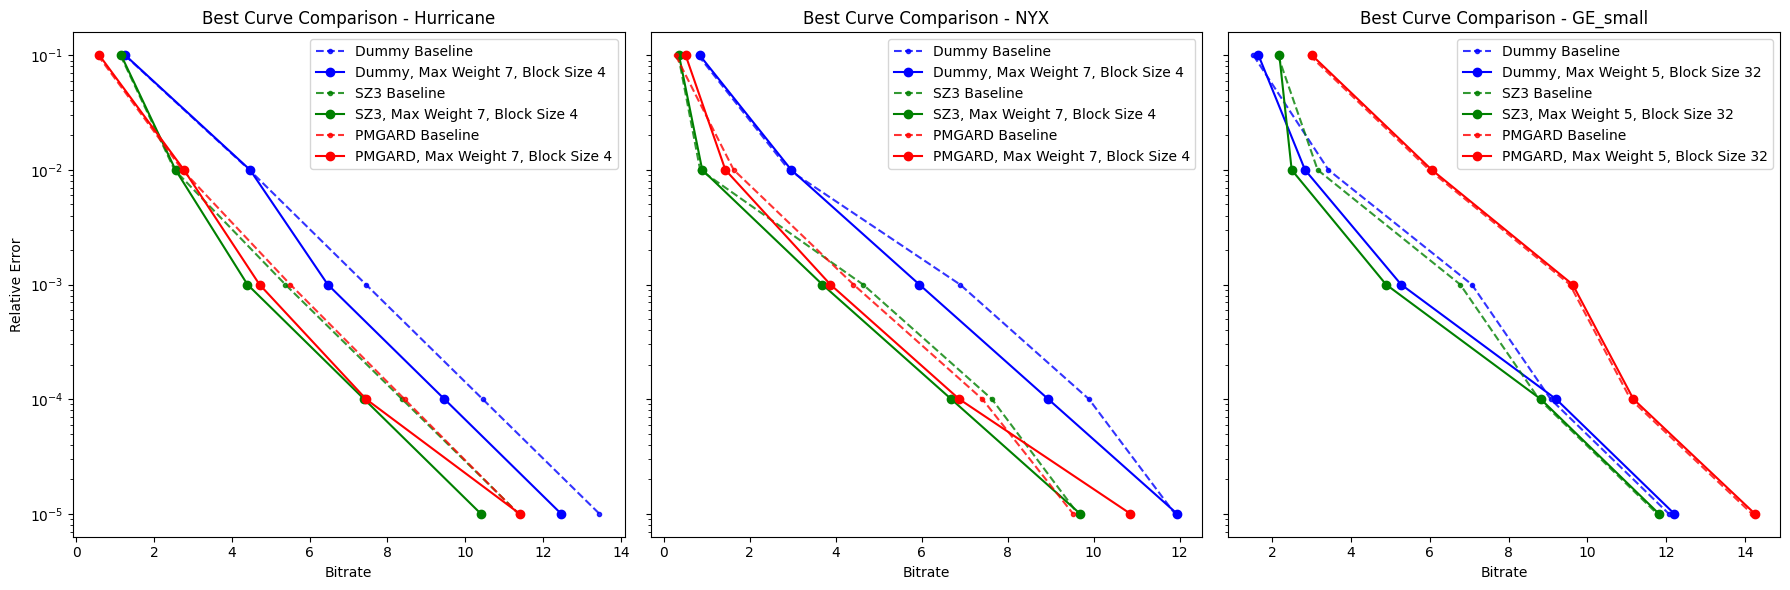

In [ ]:
from _collections import defaultdict
import matplotlib.pyplot as plt

# 文件和数据集设置
files = ["Dummy_compression_ratios.txt", "SZ3_compression_ratios.txt", "PMGARD_compression_ratios.txt"]
compressors = ["Dummy", "SZ3", "PMGARD"]  # 压缩器名称
datasets = ["Hurricane", "NYX", "GE_small"]  # 数据集名称
error_bound = [0.1, 0.01, 0.001, 0.0001, 0.00001]  # 误差范围

# 每个数据集对应的最佳参数
best_weights = [7, 7, 5]
best_block_sizes = [4, 4, 32]

# 初始化存储数据结构
best_curves = defaultdict(lambda: defaultdict(list))  # 存储最佳曲线
baselines = defaultdict(lambda: defaultdict(list))  # 存储 baseline 曲线

# 读取并解析数据
for file, compressor in zip(files, compressors):
    with open(f"./build/Result/{file}", "r") as f:
        lines = f.readlines()
    for line in lines:
        ds = line.rstrip().split(", ")[1]
        if ds not in datasets:
            continue
        if line.startswith("BP"):  # Baseline 数据
            bitrate = 32 / float(line.rstrip().split("cr = ")[1])
            baselines[ds][compressor].append(bitrate)
        else:  # 其他数据
            max_weight = int(line.rstrip().split("max_weight: ")[1].split(", ")[0])
            block_size = int(line.rstrip().split("block_size: ")[1].split(", ")[0])
            bitrate = 32 / float(line.rstrip().split("cr = ")[1])

            # 提取最佳参数曲线
            for idx, dataset in enumerate(datasets):
                if ds == dataset and max_weight == best_weights[idx] and block_size == best_block_sizes[idx]:
                    best_curves[dataset][compressor].append(bitrate)

# 压缩器对应的颜色
compressor_colors = {"Dummy": "blue", "SZ3": "green", "PMGARD": "red"}

# 绘制最佳曲线比较图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 每个数据集一个子图
for i, dataset in enumerate(datasets):
    ax = axs[i]
    for compressor in compressors:
        color = compressor_colors[compressor]  # 获取压缩器对应的颜色

        # 绘制 baseline 曲线
        baseline_x = baselines[dataset][compressor]  # X 轴为 baseline 比特率
        ax.plot(baseline_x, error_bound, label=f"{compressor} Baseline", linestyle='--', marker='.', color=color, alpha=0.8)
        
        # 绘制最佳参数的曲线
        best_x = best_curves[dataset][compressor]  # X 轴为比特率
        ax.plot(best_x, error_bound, label=f"{compressor}, Max Weight {best_weights[i]}, Block Size {best_block_sizes[i]}", linestyle='-', marker='o', color=color, alpha=1)
    
    # 子图设置
    ax.set_title(f"Best Curve Comparison - {dataset}")
    ax.set_xlabel("Bitrate")
    if i == 0:
        ax.set_ylabel("Relative Error")
    ax.set_yscale('log')  # 设置 Y 轴为对数刻度
    ax.grid(False)
    ax.legend()

# 调整布局并显示
plt.tight_layout()
plt.show()


In [ ]:
from _collections import defaultdict
import matplotlib.pyplot as plt

file="T_compression_ratios.txt"
compressors=["Dummy", "SZ3", "PMGARD"]
dataset="GE_small"
error_bound=[0.1, 0.01, 0.001, 0.0001, 0.00001]


In [70]:
file_path = './build/Result/T_compression_ratios.txt'
results = []
with open(file_path, 'r') as file:
        lines = file.readlines()

# Variables to track current BP CR
current_bp_cr = None
for line in lines:
    if line.startswith('BP,'):
        # Extract CR value from BP line
        parts = line.split('CR: aggregated cr = ')
        if len(parts) > 1:
            current_bp_cr = float(parts[1].strip())
    elif line.startswith('WBP,') and current_bp_cr is not None:
        # Extract CR value from WBP line
        parts = line.split('CR: aggregated cr = ')
        if len(parts) > 1:
            wbp_cr = float(parts[1].strip())
            if wbp_cr > current_bp_cr:
                results.append(line.strip())

for line in results:
    print(line)

WBP, Compressor: Dummy, Dataset: GE_small, max_weight: 2, block_size: 128, Error Bound: 0.001, CR: aggregated cr = 3.93592
WBP, Compressor: Dummy, Dataset: GE_small, max_weight: 2, block_size: 256, Error Bound: 0.001, CR: aggregated cr = 3.93326
WBP, Compressor: Dummy, Dataset: GE_small, max_weight: 2, block_size: 512, Error Bound: 0.001, CR: aggregated cr = 3.92788
WBP, Compressor: SZ3, Dataset: GE_small, max_weight: 2, block_size: 128, Error Bound: 0.001, CR: aggregated cr = 4.24514
WBP, Compressor: SZ3, Dataset: GE_small, max_weight: 2, block_size: 256, Error Bound: 0.001, CR: aggregated cr = 4.23935
WBP, Compressor: SZ3, Dataset: GE_small, max_weight: 2, block_size: 512, Error Bound: 0.001, CR: aggregated cr = 4.2352
